In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py 
import plotly.tools as tls 
import cufflinks as cf 
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Jalpa-08/Machine-Learning-Models/main/DATA/Telco-Customer-Churn.csv")

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7032, 22)

In [5]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [7]:
df.duplicated().sum()

0

In [8]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [9]:
df.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

In [10]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [11]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Churn', ylabel='count'>

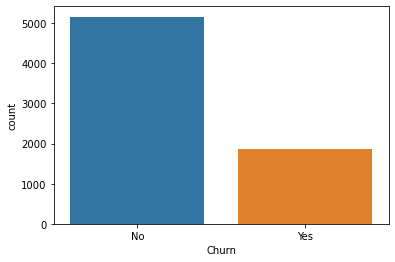

In [17]:
sns.countplot('Churn',data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

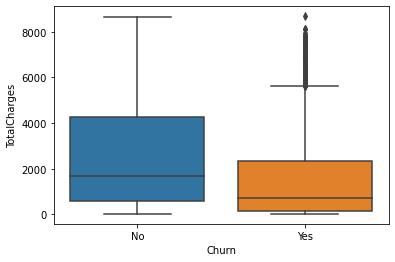

In [18]:
sns.boxplot(data=df,x='Churn',y='TotalCharges')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

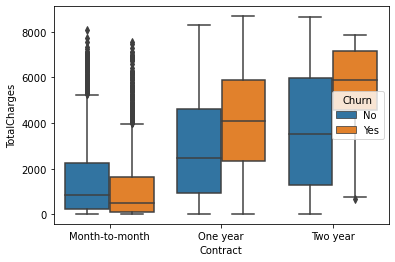

In [19]:
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')

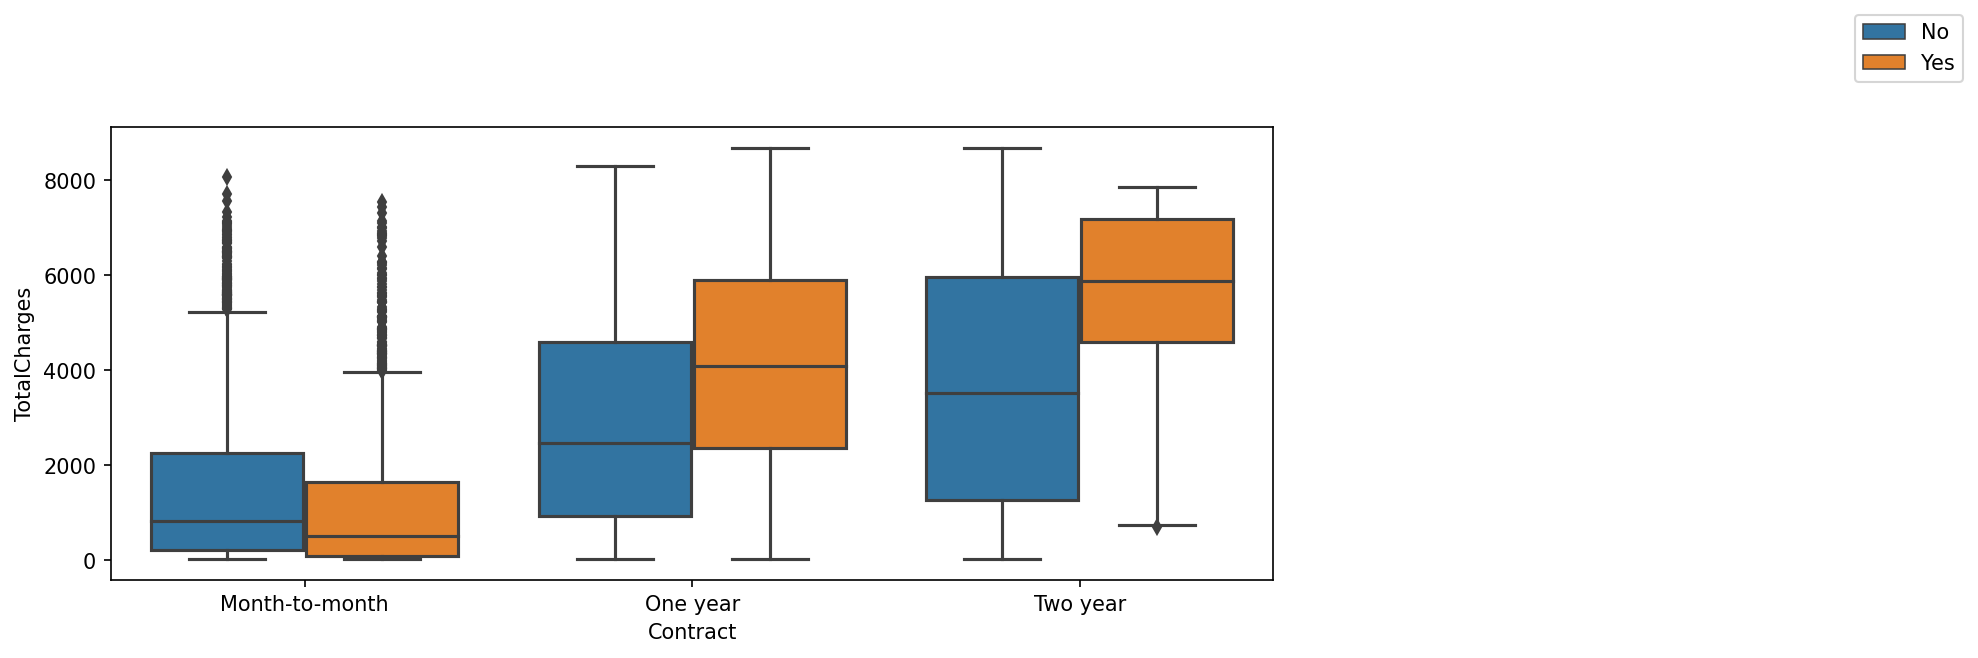

In [20]:
plt.figure(dpi=150,figsize=(10,4))
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.5,1.1))

In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df['gender']=df['gender'].map({'Female':0,'Male':1})

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0.0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,1,0,1.0,0.0,1.0,0.0,0,0.0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,1,0,1.0,1.0,0.0,0.0,0,0.0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1.0,0.0,1.0,1.0,0,0.0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,1,0.0,0.0,0.0,0.0,0,0.0,0,1,0,70.70,151.65,1


In [24]:
df['Partner']=df['Partner'].map({'No':0,'Yes':1})

In [25]:
df['Dependents']=df['Dependents'].map({'No':0,'Yes':1})

In [26]:
df['PhoneService']=df['PhoneService'].map({'No':0,'Yes':1})

In [27]:
df['OnlineSecurity']=df['OnlineSecurity'].map({'No':0,'Yes':1})

In [28]:
df['OnlineBackup']=df['OnlineBackup'].map({'No':0,'Yes':1})

In [29]:
df['DeviceProtection']=df['DeviceProtection'].map({'No':0,'Yes':1})

In [30]:
df['TechSupport']=df['TechSupport'].map({'No':0,'Yes':1})

In [31]:
df['StreamingMovies']=df['StreamingMovies'].map({'No':0,'Yes':1})

In [32]:
df['PaperlessBilling']=df['PaperlessBilling'].map({'No':0,'Yes':1})

In [33]:
df['MultipleLines']=df['MultipleLines'].map({'No phone service':0, 'No':1, 'Yes':2})

In [47]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [35]:
df['InternetService']=df['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})

In [36]:
df['Contract']=df['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})

In [37]:
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [38]:
df['Churn']=df['Churn'].map({'No':0,'Yes':1})

In [48]:
df['StreamingTV']=df['StreamingTV'].map({'No':0,'Yes':1,'No internet service':2})

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    5512 non-null   float64
 9   OnlineBackup      5512 non-null   float64
 10  DeviceProtection  5512 non-null   float64
 11  TechSupport       5512 non-null   float64
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   5512 non-null   float64
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [40]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.010284,-0.002236,-0.017665,-0.013786,0.001218,-0.008291,-0.010098,0.000095,-0.011902,-0.004928,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.113769,-0.032160,-0.110155,-0.003253,-0.011162,-0.135289,0.050055,-0.141820,0.156258,-0.093712,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.118037,0.000513,0.171581,0.173154,0.187386,0.144021,0.146731,0.294094,-0.013957,0.133280,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.019178,0.044030,0.157478,0.096695,0.084184,0.136108,0.025177,0.240556,-0.110131,0.124002,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.259112,-0.029835,0.377664,0.423038,0.423383,0.374344,0.334866,0.676734,0.004823,0.340939,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.674824,0.387266,-0.037132,0.014632,-0.005223,-0.040368,0.042939,0.003019,0.016696,-0.003106,0.248033,0.113008,0.011691
MultipleLines,-0.010284,0.113769,0.118037,-0.019178,0.259112,0.674824,1.000000,0.186852,0.006691,0.113685,0.103894,0.006221,0.172828,0.084037,0.133538,0.026248,0.491412,0.412495,0.036148
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,0.186852,1.000000,-0.222298,-0.014056,-0.000848,-0.211913,0.158724,0.099579,-0.138166,0.008851,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.017665,-0.110155,0.171581,0.157478,0.377664,-0.037132,0.006691,-0.222298,1.000000,0.179488,0.170099,0.273270,0.056238,0.411492,-0.139195,0.232648,0.069771,0.331783,-0.280508
OnlineBackup,-0.013786,-0.003253,0.173154,0.096695,0.423038,0.014632,0.113685,-0.014056,0.179488,1.000000,0.185021,0.190381,0.137064,0.318317,0.006299,0.165757,0.252683,0.431750,-0.195758


<AxesSubplot:>

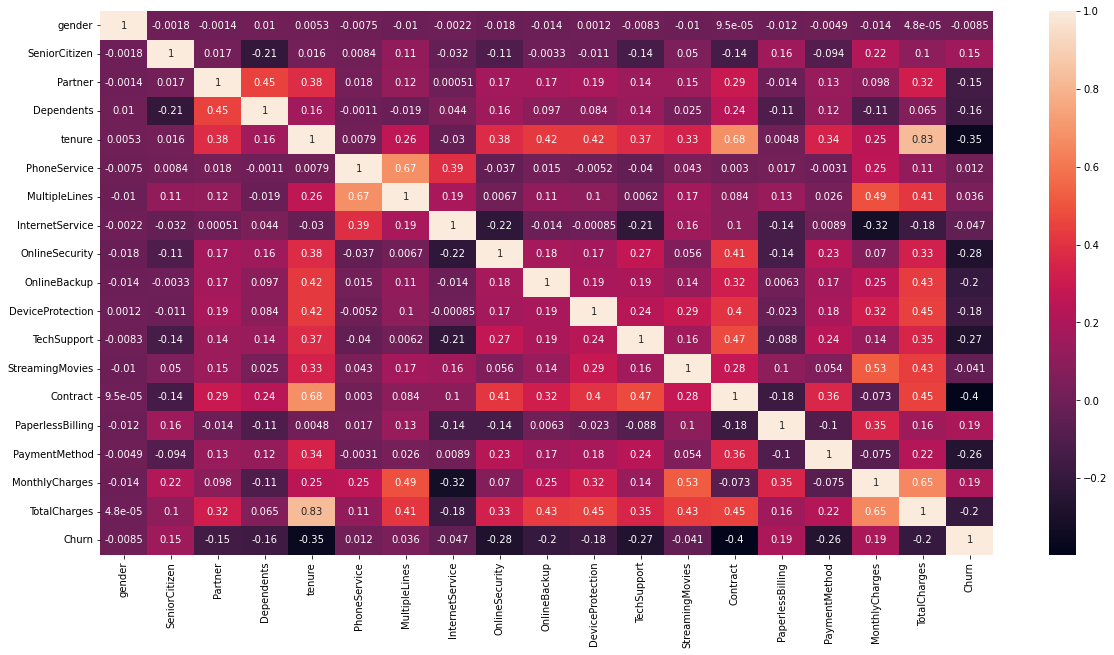

In [45]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

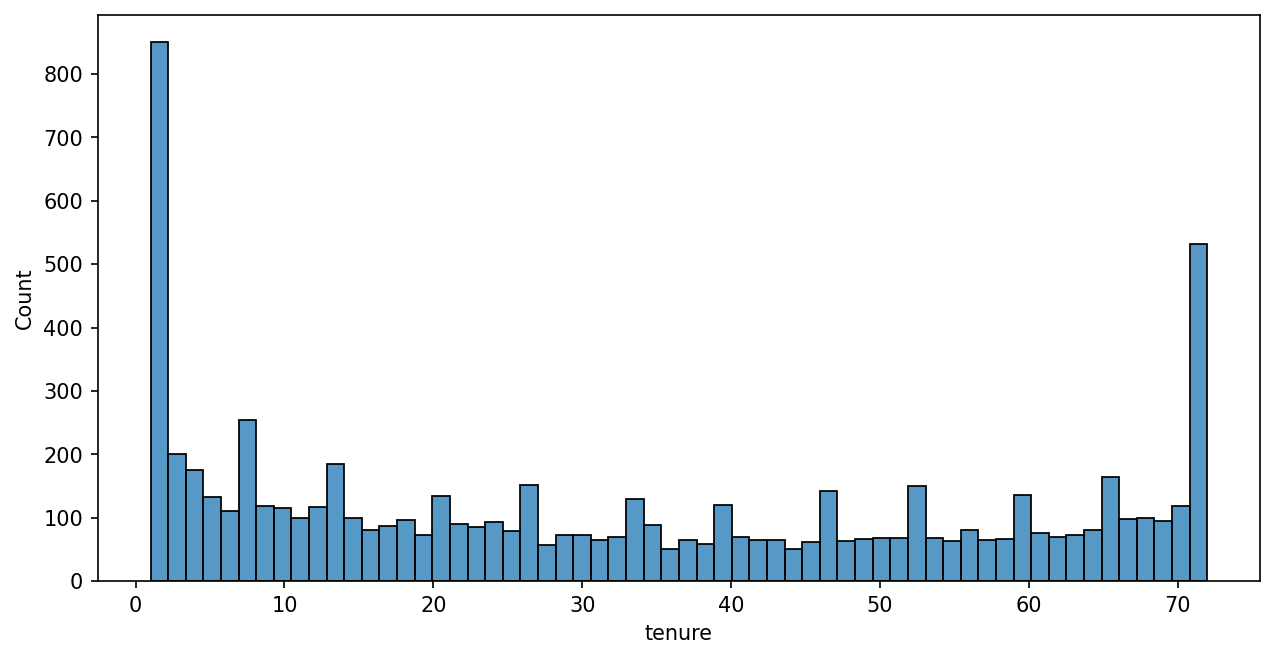

In [52]:
plt.figure(figsize=(10,5),dpi=150)
sns.histplot(data=df,x='tenure',bins=60)

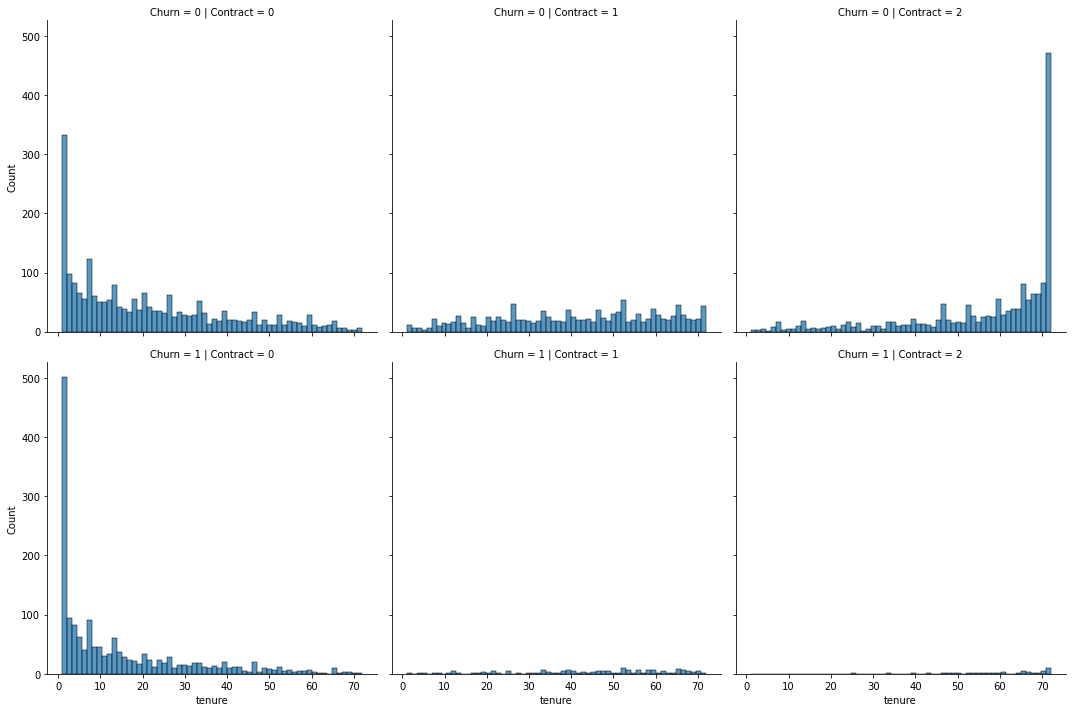

In [53]:
sns.displot(data=df,x='tenure',bins=60,col='Contract',row='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

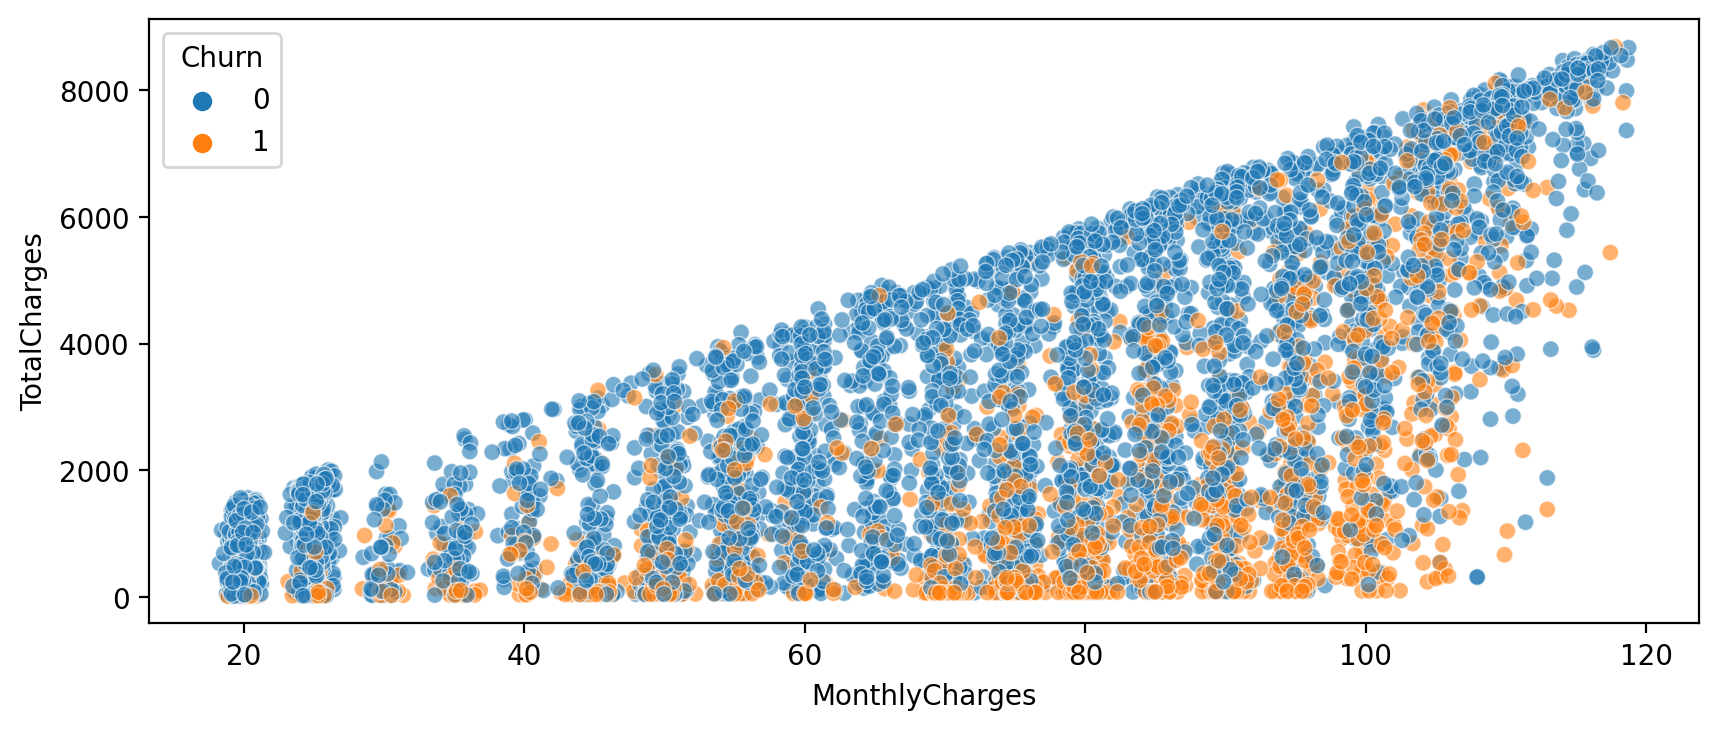

In [57]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha =0.6)

In [58]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [62]:
def cohert(tenure):
    if tenure<13:
        return '0-12 months'
    elif tenure<25:
        return '12-24 months'
    elif tenure<49:
        return '24-48 months'
    else:
        return 'over 48 months'

In [ ]:
df['tenure_cohert']= df['tenure'].apply()